# Task 2.3 - Random Forest for Kassel data (all years)
The Scripts Contents

1. Importing Libraries and Data

2. Data Wrangling

3. Reshaping for modeling

4. Data Split

5. Random Forest Model

6. Uncovering Feature Importances

# 1.Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Machine Learning\Data sets'

In [4]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [5]:
x = pd.read_csv(os.path.join(path, 'Original Data X_cleaned.csv'))

In [6]:
df1 = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
x.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.01,

In [8]:
x.shape

(22950, 135)

In [10]:
df1.shape

(22950, 16)

In [11]:
df1.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 2. Data Wrangling
Reduce data to one station only. For this script: Kassel.

In [14]:
# Create a list of the columns containing "Kassel" in their names

kassel_list = list(x for x in x.columns if x.find('KASSEL') >=0)
kassel_list

['KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max']

In [15]:
# Create a dataframe with those columns

df_kassel = x[kassel_list]
df_kassel

,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max
0,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4
1,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1
2,7,0.91,1.0129,0.12,0.60,0.0,6.5,6.0,8.0
3,8,0.87,1.0290,0.12,0.00,0.0,5.8,5.2,6.5
4,7,0.86,1.0262,0.13,0.71,0.0,5.4,3.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1
22946,7,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1
22947,8,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1
22948,7,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1


In [17]:
# Reduce answers dataset to Kassel's answers only

df1_kassel = df1['KASSEL_pleasant_weather']
df1_kassel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: KASSEL_pleasant_weather, Length: 22950, dtype: int64

In [18]:
df_kassel.shape # observations dataset has the correct shape

(22950, 9)

In [19]:
df1_kassel.shape # predictions dataset has the correct shape

(22950,)

# 3. Reshaping for modeling

In [21]:
X2 = df_kassel

In [22]:
y2 = df1_kassel

In [23]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [24]:
X.shape

(22950, 9)

In [25]:
y.shape

(22950,)

# 4. Data Split

In [26]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [28]:
X_train

array([[  3.    ,   0.65  ,   1.0157, ...,  17.1   ,  10.2   ,  21.6   ],
       [  3.    ,   0.77  ,   1.0161, ...,   9.1   ,   5.4   ,  13.1   ],
       [  4.    ,   0.89  ,   1.0113, ...,  -6.2   , -10.2   ,  -4.3   ],
       ...,
       [  8.    ,   0.84  ,   1.0113, ...,   7.4   ,   5.2   ,   9.2   ],
       [  7.    ,   0.8   ,   1.0128, ...,  10.    ,   8.5   ,  14.6   ],
       [  2.    ,   0.71  ,   1.0238, ...,   6.4   ,   1.9   ,  11.5   ]])

In [29]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
X_test

array([[ 3.    ,  0.77  ,  1.0161, ...,  9.1   ,  5.4   , 13.1   ],
       [ 7.    ,  0.58  ,  1.0153, ...,  0.3   , -4.9   ,  2.6   ],
       [ 8.    ,  0.57  ,  1.0077, ..., 19.2   , 15.1   , 25.7   ],
       ...,
       [ 1.    ,  0.89  ,  1.0159, ...,  8.4   ,  4.2   , 15.    ],
       [ 7.    ,  0.79  ,  1.025 , ...,  5.4   ,  3.1   ,  8.1   ],
       [ 8.    ,  0.88  ,  1.0175, ..., 12.5   ,  8.3   , 17.9   ]])

In [31]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 5. Random Forest Model

In [32]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Predict using the model
y_pred = clf.predict(X_test)

# Calculate and print model accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


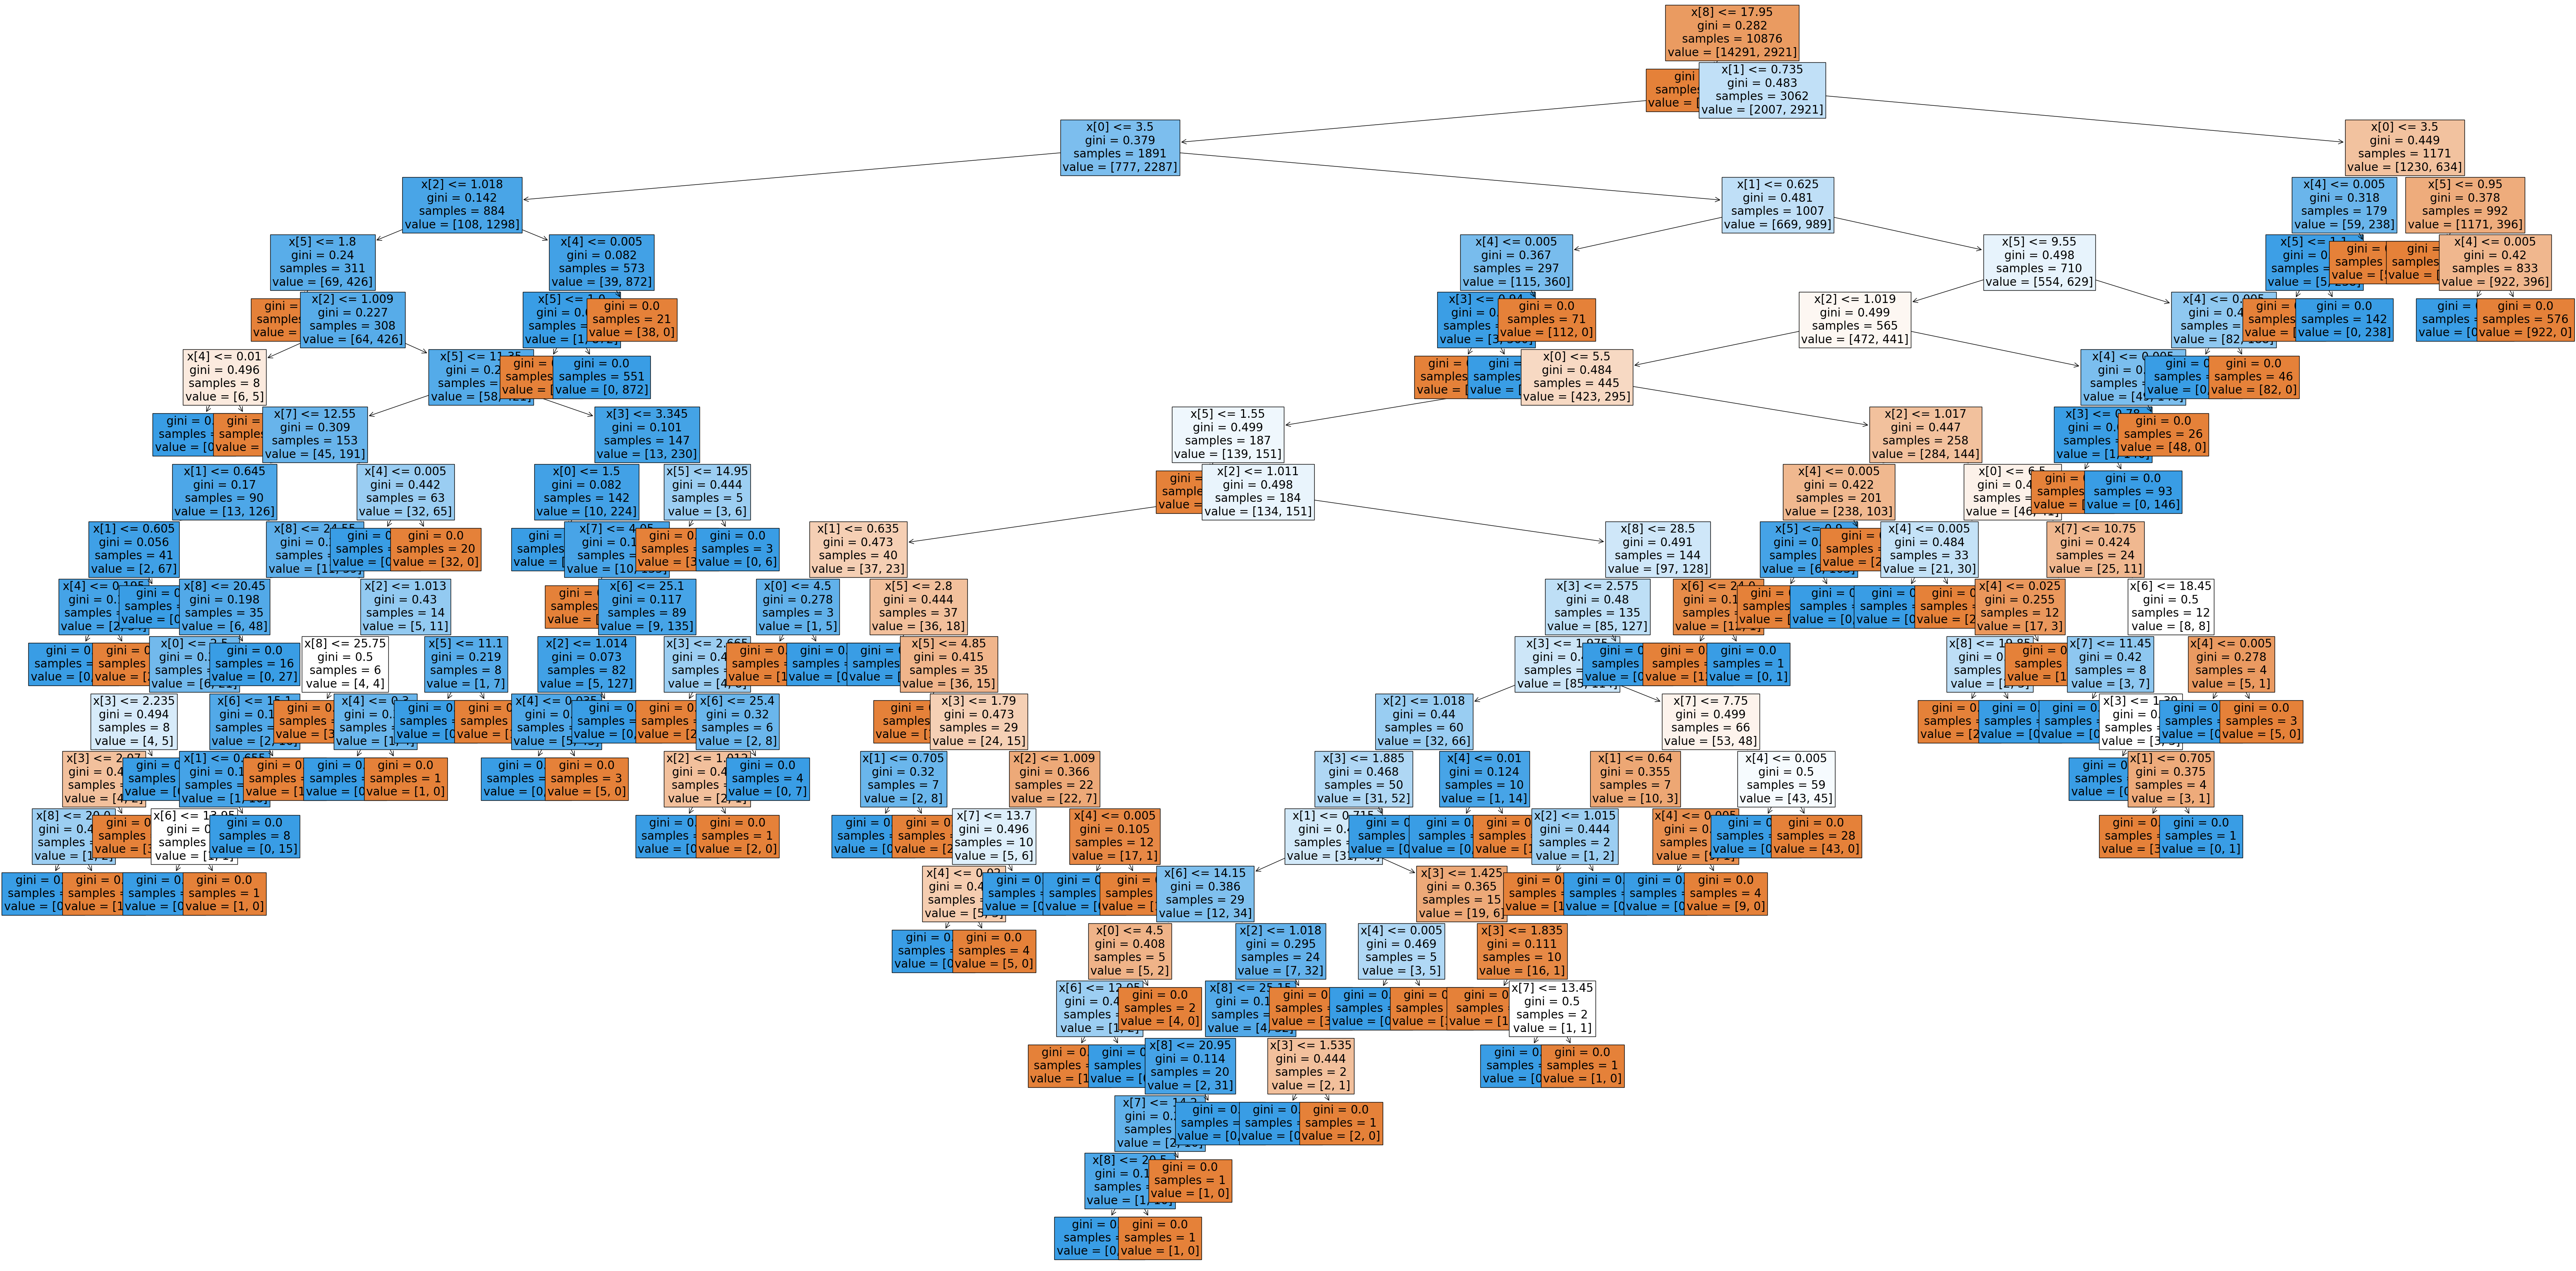

In [34]:
# Import plot_tree from sklearn.tree
from sklearn.tree import plot_tree

# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [35]:
fig.savefig(os.path.join(path, 'random_forest_kassel.png'),bbox_inches='tight')

# 6. Uncovering Feature Importances

In [36]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02532593, 0.0271293 , 0.01180949, 0.06984113, 0.33801383,
       0.08086898, 0.12683137, 0.02117395, 0.29900602])

In [39]:
# Create a list of weather features

wx_list = [feature.replace('KASSEL_', '') for feature in kassel_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [40]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.025326
humidity            0.027129
pressure            0.011809
global_radiation    0.069841
precipitation       0.338014
sunshine            0.080869
temp_mean           0.126831
temp_min            0.021174
temp_max            0.299006
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


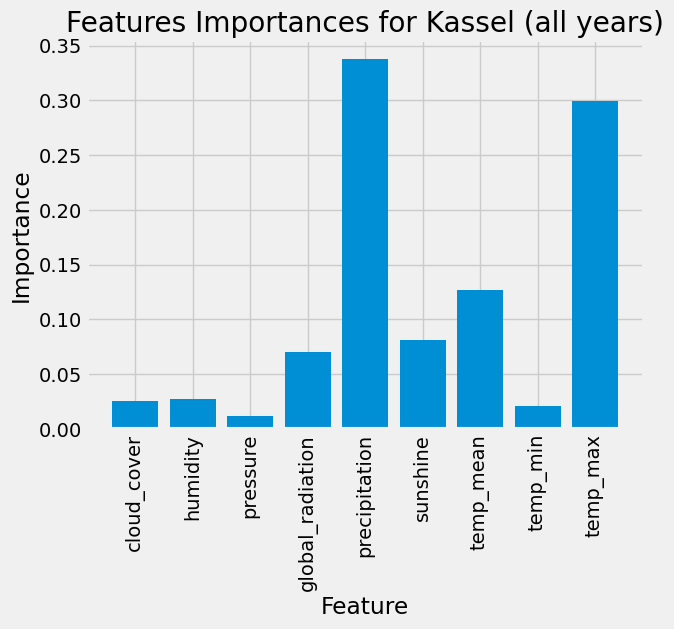

In [41]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Kassel (all years)');

plt.savefig(os.path.join(path, 'Kassel_feature_importances.png'), bbox_inches='tight')
plt.show()